In [76]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [77]:
# Cargar y preparar los datos
filename = 'data_evaluacion.csv'  # Ruta del archivo caracteristicas_vinos.csv
data = pd.read_csv(filename)

In [78]:
def leer_datos(ruta):
    df = pd.read_csv(ruta,sep=',')
    return df

In [79]:
data = leer_datos("data_evaluacion.csv")
data.head(30)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [80]:
# Obtener las columnas numéricas y categóricas
numeric_columns = data.select_dtypes(include=[np.number]).columns
categorical_columns = data.select_dtypes(exclude=[np.number]).columns

In [81]:
# Verificar si hay valores nulos en las columnas numéricas
print("Valores nulos en las columnas numéricas:")
print(data[numeric_columns].isnull().sum())

# Verificar si hay valores nulos en las columnas categóricas
print("Valores nulos en las columnas categóricas:")
print(data[categorical_columns].isnull().sum())

Valores nulos en las columnas numéricas:
39       0
77516    0
13       0
2174     0
0        0
40       0
dtype: int64
Valores nulos en las columnas categóricas:
State-gov        0
Bachelors        0
Never-married    0
Adm-clerical     0
Not-in-family    0
White            0
Male             0
United-States    0
<=50K            0
dtype: int64


In [82]:
# Renombrar las columnas del DataFrame
data.rename(columns={
    '39': 'Age',
    '77516': 'HoursPerWeek',
    '13': 'EducationLevel',
    '2174': 'PostalCode',
    '0': 'Indicator',
    '40': 'MaxHours',
    '<=50K': 'salary'
}, inplace=True)

In [83]:
# Verificar el renombramiento de las columnas
print("Columnas renombradas:")
print(data.head(10))

Columnas renombradas:
   Age         State-gov  HoursPerWeek     Bachelors  EducationLevel  \
0   50  Self-emp-not-inc         83311     Bachelors              13   
1   38           Private        215646       HS-grad               9   
2   53           Private        234721          11th               7   
3   28           Private        338409     Bachelors              13   
4   37           Private        284582       Masters              14   
5   49           Private        160187           9th               5   
6   52  Self-emp-not-inc        209642       HS-grad               9   
7   31           Private         45781       Masters              14   
8   42           Private        159449     Bachelors              13   
9   37           Private        280464  Some-college              10   

           Never-married       Adm-clerical  Not-in-family  White    Male  \
0     Married-civ-spouse    Exec-managerial        Husband  White    Male   
1               Divorced  Handl

In [84]:
# Cambiar el nombre de la columna
data.rename(columns={'<=50K': 'salary'}, inplace=True)

# Mostrar las primeras filas del DataFrame para verificar el cambio
print(data.head())

   Age         State-gov  HoursPerWeek  Bachelors  EducationLevel  \
0   50  Self-emp-not-inc         83311  Bachelors              13   
1   38           Private        215646    HS-grad               9   
2   53           Private        234721       11th               7   
3   28           Private        338409  Bachelors              13   
4   37           Private        284582    Masters              14   

        Never-married       Adm-clerical  Not-in-family  White    Male  \
0  Married-civ-spouse    Exec-managerial        Husband  White    Male   
1            Divorced  Handlers-cleaners  Not-in-family  White    Male   
2  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
3  Married-civ-spouse     Prof-specialty           Wife  Black  Female   
4  Married-civ-spouse    Exec-managerial           Wife  White  Female   

   PostalCode  Indicator  MaxHours  United-States salary  
0           0          0        13  United-States  <=50K  
1           0         

In [85]:
# Actualizar las columnas categóricas después de renombrar
categorical_columns = data.select_dtypes(exclude=[np.number]).columns


In [86]:
# 2. Codificar Columnas Categóricas
categorical_columns = data.select_dtypes(exclude=[np.number]).columns

In [87]:
# Codificar columnas categóricas
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])


In [102]:
# Verificar las primeras filas después de la codificación
data.head(40)


,Age,State-gov,HoursPerWeek,Bachelors,EducationLevel,Never-married,Adm-clerical,Not-in-family,White,Male,PostalCode,Indicator,MaxHours,United-States,salary,Cluster
0,0.828300,6,-1.007127,9,1.136539,2,4,0,4,1,-0.144799,-0.217129,-2.213010,39,0,1
1,-0.046940,4,0.246012,11,-0.419313,0,6,1,4,1,-0.144799,-0.217129,-0.034087,39,0,0
2,1.047111,4,0.426642,1,-1.197239,2,6,0,2,1,-0.144799,-0.217129,-0.034087,39,0,1
3,-0.776308,4,1.408510,9,1.136539,2,10,5,2,0,-0.144799,-0.217129,-0.034087,5,0,0
4,-0.119877,4,0.898798,12,1.525502,2,4,5,4,0,-0.144799,-0.217129,-0.034087,39,0,1
5,0.755364,4,-0.279154,6,-1.975165,3,8,1,2,0,-0.144799,-0.217129,-1.970908,23,0,0
6,0.974174,6,0.189158,11,-0.419313,2,4,0,4,1,-0.144799,-0.217129,0.369417,39,1,1
7,-0.557498,4,-1.362515,12,1.525502,4,10,1,4,0,1.745159,-0.217129,0.772921,39,1,1
8,0.244806,4,-0.286142,9,1.136539,2,4,0,4,1,0.550046,-0.217129,-0.034087,39,1,1
9,-0.119877,4,0.859803,15,-0.030350,2,4,0,2,1,-0.144799,-0.217129,3.193947,39,1,1


In [89]:
# 3. Normalización de Datos
# Normalización de los datos
scaler = StandardScaler()
numeric_columns = ['Age', 'HoursPerWeek', 'EducationLevel', 'PostalCode', 'Indicator', 'MaxHours']
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


In [90]:
# Mostrar las primeras 5 filas después de la normalización
print(data.head())


        Age  State-gov  HoursPerWeek  Bachelors  EducationLevel  \
0  0.828300          6     -1.007127          9        1.136539   
1 -0.046940          4      0.246012         11       -0.419313   
2  1.047111          4      0.426642          1       -1.197239   
3 -0.776308          4      1.408510          9        1.136539   
4 -0.119877          4      0.898798         12        1.525502   

   Never-married  Adm-clerical  Not-in-family  White  Male  PostalCode  \
0              2             4              0      4     1   -0.144799   
1              0             6              1      4     1   -0.144799   
2              2             6              0      2     1   -0.144799   
3              2            10              5      2     0   -0.144799   
4              2             4              5      4     0   -0.144799   

   Indicator  MaxHours  United-States  salary  
0  -0.217129 -2.213010             39       0  
1  -0.217129 -0.034087             39       0  
2  -0.21

In [91]:
# 4. Clustering con KMeans
# Aplicar KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data[numeric_columns])
labels = kmeans.labels_

c:\Users\Adali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [92]:
# Añadir etiquetas de clúster a los datos originales
data['Cluster'] = labels


In [93]:
# Mostrar las primeras 5 filas después de agregar los clusters
print(data.head())


        Age  State-gov  HoursPerWeek  Bachelors  EducationLevel  \
0  0.828300          6     -1.007127          9        1.136539   
1 -0.046940          4      0.246012         11       -0.419313   
2  1.047111          4      0.426642          1       -1.197239   
3 -0.776308          4      1.408510          9        1.136539   
4 -0.119877          4      0.898798         12        1.525502   

   Never-married  Adm-clerical  Not-in-family  White  Male  PostalCode  \
0              2             4              0      4     1   -0.144799   
1              0             6              1      4     1   -0.144799   
2              2             6              0      2     1   -0.144799   
3              2            10              5      2     0   -0.144799   
4              2             4              5      4     0   -0.144799   

   Indicator  MaxHours  United-States  salary  Cluster  
0  -0.217129 -2.213010             39       0        1  
1  -0.217129 -0.034087             39 

In [94]:
# 5. Preparar Datos para KNN
# Separar características y variable objetivo
X = data.drop(columns=['salary', 'Cluster'])
y = data['salary']


In [95]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [96]:
# 6. Entrenar y Evaluar el Modelo KNeighborsClassifier
# Entrenar el modelo KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [97]:
# Realizar predicciones
y_pred = knn_model.predict(X_test)


In [100]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.8310926090220433
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11166
           1       0.67      0.58      0.62      3487

    accuracy                           0.83     14653
   macro avg       0.77      0.74      0.76     14653
weighted avg       0.82      0.83      0.83     14653



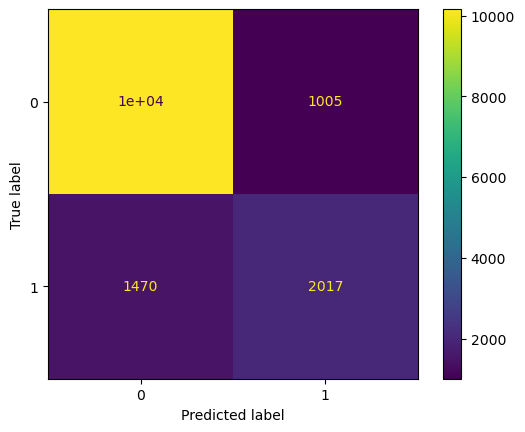

[[10161  1005]
 [ 1470  2017]]


In [104]:
# Mostrar la matriz de confusión
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()
plt.show()
print(conf_matrix)